https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/

Derived Variables - 
* AON (convert days to months)





Import Statements

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import os

# Download the data from GDrive

In [116]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

ModuleNotFoundError: No module named 'google'

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Refer to this for the **dir_id**

https://stackoverflow.com/questions/48436959/how-to-upload-csv-file-and-use-it-from-google-drive-into-google-colaboratory?rq=1


https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

In [ ]:
dir_id = "1SrJ8S1wXZ-eoTvuVCwjx6DZAg1p3lDdH"
file_list = drive.ListFile(
    {'q': "title contains 'telecom_churn_data.csv' and '1SrJ8S1wXZ-eoTvuVCwjx6DZAg1p3lDdH' in parents"}).GetList()

for f in file_list:
  print('title: %s, id: %s' % (f['title'], f['id']))

In [ ]:
download_path = os.path.expanduser('~/data')
try:
  os.makedirs(download_path)
except FileExistsError:
  pass

In [ ]:
# f['title']
data_set_name = "telecom_churn_data.csv" 
# f['id']
data_set_id = "1SWnADIda31mVFevFcfkGtcgBHTKKI94J"

output_file = os.path.join(download_path, data_set_name)
temp_file = drive.CreateFile({'id': data_set_id})
temp_file.GetContentFile(output_file)

In [ ]:
print(output_file)

In [ ]:

# fusermount -u drive
# !google-drive-ocamlfuse drive

In [ ]:
# with open(output_file1, 'r') as f:
#   print(f.read())

#### Read the data to Dataframe

In [ ]:
output_file = 'telecom_churn_data.csv'

In [ ]:
data = pd.read_csv(output_file)

In [ ]:
data.info(verbose=True)

In [ ]:
data.head()

In [ ]:
data.columns

In [ ]:
len(data.mobile_number.unique())

In [ ]:
a = data.last_date_of_month_6.iloc[1]
print(a, type(a))


In [ ]:
# data.nunique(axis=1)

In [ ]:
uni_6 = data.last_date_of_month_6.unique()
print(len(uni_6), uni_6)

uni_7 = data.last_date_of_month_7.unique()
print(len(uni_7), uni_7)

uni_8 = data.last_date_of_month_8.unique()
print(len(uni_8), uni_8)

uni_9 = data.last_date_of_month_8.unique()
print(len(uni_9), uni_9)


*   Impute the missing 'nan' values in last_date_of_month_? with end data of the month
*   Convert into datetime object using pd.to_datetime



In [117]:
print(data.circle_id.nunique())
print(data.circle_id.unique())

1
[109]


circle_id => can be dropped

Below are variables which should be yes/no => categorical variables

*   fb_user_6	
*   fb_user_7
*   fb_user_8
*   fb_user_9

*   night_pck_user_6
*   night_pck_user_7
*   night_pck_user_8
*   night_pck_user_9

This can also be retained as '1' and '0' => better verify both the ways


Sort the columns for better understanding (all loc_, std_, etc., will come up in a better way)

In [118]:
df = data.reindex(sorted(data.columns), axis=1)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, aon to vol_3g_mb_9
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [120]:
# df.to_csv('telecom_churn_data1.csv')

In [121]:
cols = sorted(df.columns)
print(len(cols), type(cols), cols)

226 <class 'list'> ['aon', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'aug_vbc_3g', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'circle_id', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'isd_ic_mou_9', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'isd_og_mou_9', 'jul_vbc_3g', 'jun_vbc_3g', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_mont

In [122]:
count_cols = [col for col in df.columns if 'count' in col]

print(len(count_cols), type(count_cols))
# count_cols

8 <class 'list'>


In [123]:
loc_cols = [col for col in df.columns if 'loc' in col]
print(len(loc_cols), type(loc_cols))

38 <class 'list'>


In [124]:
arpu_cols = [col for col in df.columns if 'arpu' in col]
print(len(arpu_cols), type(arpu_cols))

12 <class 'list'>


In [125]:
av_rech_amt_cols = [col for col in df.columns if 'av_rech_amt' in col]
print(len(av_rech_amt_cols), type(av_rech_amt_cols))

4 <class 'list'>


In [126]:
df.filter(like = "arpu", axis =1).columns

Index(['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_6', 'arpu_7', 'arpu_8',
       'arpu_9'],
      dtype='object')

In [127]:
df.filter(like = "loc", axis =1).columns

Index(['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'loc_ic_mou_9',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'loc_ic_t2f_mou_9', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_9', 'loc_ic_t2o_mou',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2t_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
       'loc_og_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2m_mou_9', 'loc_og_t2o_mou', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9'],
      dtype='object')

In [128]:
df.filter(like = "amt", axis =1).columns

Index(['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'last_day_rch_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9'],
      dtype='object')

In [129]:
df.filter(like = "_6", axis =1).columns

Index(['arpu_2g_6', 'arpu_3g_6', 'arpu_6', 'av_rech_amt_data_6',
       'count_rech_2g_6', 'count_rech_3g_6', 'date_of_last_rech_6',
       'date_of_last_rech_data_6', 'fb_user_6', 'ic_others_6', 'isd_ic_mou_6',
       'isd_og_mou_6', 'last_date_of_month_6', 'last_day_rch_amt_6',
       'loc_ic_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2t_mou_6', 'loc_og_mou_6', 'loc_og_t2c_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2t_mou_6',
       'max_rech_amt_6', 'max_rech_data_6', 'monthly_2g_6', 'monthly_3g_6',
       'night_pck_user_6', 'offnet_mou_6', 'og_others_6', 'onnet_mou_6',
       'roam_ic_mou_6', 'roam_og_mou_6', 'sachet_2g_6', 'sachet_3g_6',
       'spl_ic_mou_6', 'spl_og_mou_6', 'std_ic_mou_6', 'std_ic_t2f_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2o_mou_6', 'std_ic_t2t_mou_6',
       'std_og_mou_6', 'std_og_t2c_mou_6', 'std_og_t2f_mou_6',
       'std_og_t2m_mou_6', 'std_og_t2t_mou_6', 'total_ic_mou_6',
       'total_og_mou_6', 'total_rech

In [130]:
df.filter(like = "date", axis =1).columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'last_date_of_month_6',
       'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9'],
      dtype='object')

In [131]:
# IGnore - this is wrong and unecessary
# total_rech_amt_6', 'total_rech_data_6','total_rech_num_6'
rech_6_manual = df.total_rech_data_6 + df.total_rech_num_6
print(rech_6_manual.equals(df.total_rech_amt_6))
df_temp = pd.concat([rech_6_manual, df.total_rech_amt_6, df.total_rech_data_6, df.total_rech_num_6], axis=1)
print(rech_6_manual[:10])
df_temp.head(10)

False
0    5.0
1    NaN
2    NaN
3    NaN
4    6.0
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
dtype: float64


,0,total_rech_amt_6,total_rech_data_6,total_rech_num_6
0,5.0,362,1.0,4
1,NaN,74,NaN,4
2,NaN,168,NaN,5
3,NaN,230,NaN,10
4,6.0,196,1.0,5
5,NaN,120,NaN,2
6,NaN,499,NaN,15
7,NaN,1580,NaN,5
8,NaN,437,NaN,19
9,NaN,220,NaN,4


In [132]:
arpu_6_vk = (df.arpu_2g_6 + df.arpu_3g_6+df.aug_vbc_3g)

In [133]:
arpu_6_vk.equals(df.arpu_6)

False

In [134]:
print(arpu_6_vk[:10])

0    454.74
1       NaN
2       NaN
3       NaN
4      0.00
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
dtype: float64


In [135]:
df.arpu_6[:10]

0     197.385
1      34.047
2     167.690
3     221.338
4     261.636
5      50.258
6     429.023
7    1069.180
8     378.721
9     119.518
Name: arpu_6, dtype: float64

In [136]:
print(df.arpu_2g_6[:10], df.arpu_3g_6[:10])

0    212.17
1       NaN
2       NaN
3       NaN
4      0.00
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: arpu_2g_6, dtype: float64 0    212.17
1       NaN
2       NaN
3       NaN
4      0.00
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: arpu_3g_6, dtype: float64


In [137]:

# computing Null Values 
df.isnull().sum()

aon                        0
arpu_2g_6              74846
arpu_2g_7              74428
arpu_2g_8              73660
arpu_2g_9              74077
arpu_3g_6              74846
arpu_3g_7              74428
arpu_3g_8              73660
arpu_3g_9              74077
arpu_6                     0
arpu_7                     0
arpu_8                     0
arpu_9                     0
aug_vbc_3g                 0
av_rech_amt_data_6     74846
av_rech_amt_data_7     74428
av_rech_amt_data_8     73660
av_rech_amt_data_9     74077
circle_id                  0
count_rech_2g_6        74846
count_rech_2g_7        74428
count_rech_2g_8        73660
count_rech_2g_9        74077
count_rech_3g_6        74846
count_rech_3g_7        74428
count_rech_3g_8        73660
count_rech_3g_9        74077
date_of_last_rech_6     1607
date_of_last_rech_7     1767
date_of_last_rech_8     3622
                       ...  
std_og_t2t_mou_8        5378
std_og_t2t_mou_9        7745
total_ic_mou_6             0
total_ic_mou_7

In [138]:
nul_percentage = round(100*(data.isnull().sum()/len(data.index)),2)

In [139]:
print((sorted(nul_percentage, reverse=True))[:41], len(nul_percentage))

[74.85, 74.85, 74.85, 74.85, 74.85, 74.85, 74.85, 74.85, 74.85, 74.85, 74.43, 74.43, 74.43, 74.43, 74.43, 74.43, 74.43, 74.43, 74.43, 74.43, 74.08, 74.08, 74.08, 74.08, 74.08, 74.08, 74.08, 74.08, 74.08, 74.08, 73.66, 73.66, 73.66, 73.66, 73.66, 73.66, 73.66, 73.66, 73.66, 73.66, 7.75] 226


In [140]:
len(nul_percentage[nul_percentage>70])

40

In [141]:
len(nul_percentage[nul_percentage>60])

40

In [142]:
len(nul_percentage[nul_percentage>6])

69

IT appears we can remove where there are more than 73% missing values

In [143]:
to_remove = nul_percentage[nul_percentage>73]

In [144]:
to_remove

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

But, below columns are of type categorical; When the data is not present we can safely assume the
user is not a night_pack or fb_user

so before dropping the columns, need further cleaning.

* night_pck_user_6            74.85
* night_pck_user_7            74.43
* night_pck_user_8            73.66
* night_pck_user_9            74.08
* fb_user_6                   74.85
* fb_user_7                   74.43
* fb_user_8                   73.66
* fb_user_9                   74.08

Before proceeding any further, lets do the following - 

#### Drop columns 
* where there is only 1 unique value
* replace missing values in categorical variables with 0 (0-no, 1 - yes)

In [145]:
data['date_of_last_rech_6'][:3]

0    6/21/2014
1    6/29/2014
2    6/17/2014
Name: date_of_last_rech_6, dtype: object

In [146]:
date_columns = list(df.filter(like = "date", axis =1).columns)
(date_columns)

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9']

In [147]:
categorical_columns = ['night_pck_user_6',
'night_pck_user_7',
'night_pck_user_8',
'night_pck_user_9',
'fb_user_6',
'fb_user_7',
'fb_user_8',
'fb_user_9']

print(type(categorical_columns), categorical_columns)

<class 'list'> ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


In [148]:
numerical_columsn = [col for col in df.columns if col not in (categorical_columns+date_columns)]

In [149]:
print(len(numerical_columsn+date_columns+categorical_columns))
print(len(df.columns))

226
226


In [150]:
data['std_og_t2c_mou_9'].unique()

array([nan,  0.])

In [151]:
unique_Values = df.apply(lambda x: x.nunique())

In [152]:
unique_Values.sort_values()[:20]

last_date_of_month_8    1
std_og_t2c_mou_9        1
std_og_t2c_mou_8        1
circle_id               1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_9    1
std_og_t2c_mou_7        1
std_og_t2o_mou          1
std_ic_t2o_mou_9        1
std_og_t2c_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_6        1
loc_ic_t2o_mou          1
loc_og_t2o_mou          1
std_ic_t2o_mou_8        1
fb_user_7               2
night_pck_user_9        2
night_pck_user_8        2
night_pck_user_7        2
dtype: int64

In [153]:
cols_to_delete = []

In [154]:
cols_to_delete = cols_to_delete + list(unique_Values[unique_Values==1].index)
print(cols_to_delete, type(cols_to_delete))

['circle_id', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'loc_ic_t2o_mou', 'loc_og_t2o_mou', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_og_t2o_mou'] <class 'list'>



consolidate

    Categorical Variables (replace missing values with 2)
    0->No, 1-Yes, 2-Unknown



In [155]:
# dummies - 0,1,2;
# p

In [156]:
print(df[categorical_columns].nunique())
for col in categorical_columns:
    print(col, df[col].unique())

night_pck_user_6    2
night_pck_user_7    2
night_pck_user_8    2
night_pck_user_9    2
fb_user_6           2
fb_user_7           2
fb_user_8           2
fb_user_9           2
dtype: int64
night_pck_user_6 [ 0. nan  1.]
night_pck_user_7 [ 0. nan  1.]
night_pck_user_8 [ 0. nan  1.]
night_pck_user_9 [nan  0.  1.]
fb_user_6 [ 1. nan  0.]
fb_user_7 [ 1. nan  0.]
fb_user_8 [ 1. nan  0.]
fb_user_9 [nan  1.  0.]


In [157]:
# df[categorical_columns].fillna(-1, inplace=True)
for col in categorical_columns:
    df[col].fillna(value=-1, inplace=True)

In [158]:
print(df[categorical_columns].nunique())
for col in categorical_columns:
    print(col, df[col].unique())

night_pck_user_6    3
night_pck_user_7    3
night_pck_user_8    3
night_pck_user_9    3
fb_user_6           3
fb_user_7           3
fb_user_8           3
fb_user_9           3
dtype: int64
night_pck_user_6 [ 0. -1.  1.]
night_pck_user_7 [ 0. -1.  1.]
night_pck_user_8 [ 0. -1.  1.]
night_pck_user_9 [-1.  0.  1.]
fb_user_6 [ 1. -1.  0.]
fb_user_7 [ 1. -1.  0.]
fb_user_8 [ 1. -1.  0.]
fb_user_9 [-1.  1.  0.]



Categorical done
drop unique columsn where there is no variance

    unique value = 1



In [159]:
df.shape

(99999, 226)

In [160]:
df.drop(labels=cols_to_delete, axis=1, inplace=True)

In [161]:
df.shape

(99999, 210)

check missing attributes

In [162]:
(round((df.isnull().sum(axis=0)/len(df.index))*100,2)).sort_values(ascending=False)[:45]

count_rech_3g_6             74.85
arpu_3g_6                   74.85
total_rech_data_6           74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
arpu_2g_6                   74.85
arpu_3g_7                   74.43
av_rech_amt_data_7          74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
date_of_last_rech_data_7    74.43
max_rech_data_7             74.43
total_rech_data_7           74.43
count_rech_2g_7             74.43
date_of_last_rech_data_9    74.08
av_rech_amt_data_9          74.08
count_rech_2g_9             74.08
arpu_3g_9                   74.08
max_rech_data_9             74.08
arpu_2g_9                   74.08
count_rech_3g_9             74.08
total_rech_data_9           74.08
max_rech_data_8             73.66
count_rech_3g_8             73.66
count_rech_2g_8             73.66
total_rech_data_8           73.66
av_rech_amt_data_8          73.66
arpu_3g_8     


TODO

Analyse the recharge colums and fill missing values for "As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)."
2. Filter high-value customers As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase). # total_rech_data_6 # total_rech_data_7 # av_rech_amt_data_6 # av_rech_amt_data_7 

In [163]:
df_temp = df[['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']]

In [164]:
df_temp.describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,7546.000000,4365.000000,4076.000000,4061.000000


In [165]:
(round((df_temp.isnull().sum(axis=0)/len(df_temp.index))*100,2))

total_rech_data_6     74.85
total_rech_data_7     74.43
total_rech_data_8     73.66
total_rech_data_9     74.08
av_rech_amt_data_6    74.85
av_rech_amt_data_7    74.43
av_rech_amt_data_8    73.66
av_rech_amt_data_9    74.08
dtype: float64

In [166]:
df.total_rech_data_6.fillna(value=0,inplace=True)
df.total_rech_data_7.fillna(value=0,inplace=True)
df.total_rech_data_8.fillna(value=0,inplace=True)
df.total_rech_data_9.fillna(value=0,inplace=True)

df.av_rech_amt_data_6.fillna(value=0, inplace=True)
df.av_rech_amt_data_7.fillna(value=0, inplace=True)
df.av_rech_amt_data_8.fillna(value=0, inplace=True)
df.av_rech_amt_data_9.fillna(value=0, inplace=True)

In [167]:
nul_percentage = (round((df.isnull().sum(axis=0)/len(df.index))*100,2))
nul_percentage[nul_percentage>70]

arpu_2g_6                   74.85
arpu_2g_7                   74.43
arpu_2g_8                   73.66
arpu_2g_9                   74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
dtype: float64

In [168]:
cols_to_drop = nul_percentage[nul_percentage>70].index

print(cols_to_drop)

Index(['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9'],
      dtype='object')


In [169]:
df.drop(labels=cols_to_drop, axis=1, inplace=True)

In [170]:
df.shape

(99999, 186)

In [171]:
# df.total_rech_data_6
# df.av_rech_amt_data_6

a = df.total_rech_data_6 * df.av_rech_amt_data_6
print(a[:5])
print(len(a), type(a))

0    252.0
1      0.0
2      0.0
3      0.0
4     56.0
dtype: float64
99999 <class 'pandas.core.series.Series'>


In [172]:
df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7
df['total_data_rech_8'] = df.total_rech_data_8 * df.av_rech_amt_data_8
df['total_data_rech_9'] = df.total_rech_data_9 * df.av_rech_amt_data_9

In [173]:
df.shape

(99999, 190)

In [174]:
cols_to_drop = ['total_rech_data_6', 'total_rech_data_7','total_rech_data_8','total_rech_data_9',
               'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']

In [175]:
df.drop(labels=cols_to_drop, axis=1, inplace=True)
print(df.shape)

(99999, 182)


In [176]:
df['total_amt_6'] = df.total_rech_amt_6 + df.total_data_rech_6
df['total_amt_7'] = df.total_rech_amt_7 + df.total_data_rech_7
df['total_amt_8'] = df.total_rech_amt_8 + df.total_data_rech_8
df['total_amt_9'] = df.total_rech_amt_9 + df.total_data_rech_9

2. Filter high-value customers As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase). 

In [177]:
((df.total_amt_6 + df.total_amt_7)/2).isnull().sum()

0

In [178]:
df['av_amt_rech_6_7']=(df.total_amt_6 + df.total_amt_7)/2

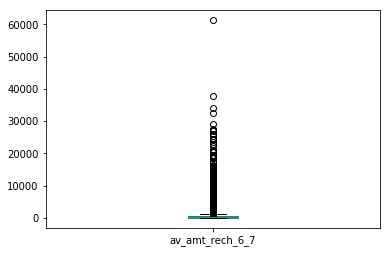

In [179]:
df['av_amt_rech_6_7'].plot.box()

In [180]:
df['av_amt_rech_6_7'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0        0.0
0.1       60.0
0.2      108.5
0.3      155.0
0.4      209.5
0.5      275.0
0.6      360.0
0.7      478.0
0.8      656.5
0.9     1028.0
1.0    61236.0
Name: av_amt_rech_6_7, dtype: float64

In [181]:
avg_amt_rech_2_mon = df['av_amt_rech_6_7'].quantile(0.7)

In [182]:
filter = df['av_amt_rech_6_7'] >= avg_amt_rech_2_mon

In [183]:
df = df[filter]

In [184]:
df.shape

(30001, 187)

 *  After filtering the high-value customers, you should get about 29.9k rows3. Tag churners and remove attributes of the churn phase Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are: 
  * total_ic_mou_9 
  * total_og_mou_9 
  * vol_2g_mb_9 
  * vol_3g_mb_9
After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names). 
    
* After applying filter we have around 30k rows ( ~ 100 rows extra - Need to check what else missed to take into account )

In [185]:
df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,30001.000000,30001.000000,30001.000000,30001.000000
mean,264.901497,500.869219,91.435910,349.513848
std,358.290694,666.902007,282.370006,947.079372
min,0.000000,0.000000,0.000000,0.000000
25%,50.480000,47.640000,0.000000,0.000000
50%,157.980000,284.940000,0.000000,0.000000
75%,343.540000,698.680000,38.000000,320.610000
max,7785.730000,11517.730000,8993.950000,39221.270000


In [186]:
#### Change to OR fro AND

def isUserChurn(df):
  if(df['total_ic_mou_9'] > 0 or df['total_og_mou_9'] > 0 or df['vol_2g_mb_9'] > 0 or df['vol_3g_mb_9'] > 0):
    return 0
  else:
    return 1

In [187]:
df['churn'] = df.apply(isUserChurn, axis=1)

In [188]:
df.shape

(30001, 188)

In [189]:
date_columns

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9']

In [190]:
# should i drop below columns? or not? How to impute missing values? or drop the rows where data is missing?
cols_to_drop = list(df.filter(like = "date", axis =1).columns)
print(cols_to_drop)
# df.drop(labels=cols_to_drop, axis=1, inplace=True)

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [191]:
# dropping 9th month cols
cols_to_drop = (list(df.filter(like ='_9', axis =1).columns))

In [192]:
print(cols_to_drop)

['arpu_9', 'date_of_last_rech_9', 'fb_user_9', 'ic_others_9', 'isd_ic_mou_9', 'isd_og_mou_9', 'last_day_rch_amt_9', 'loc_ic_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2t_mou_9', 'loc_og_mou_9', 'loc_og_t2c_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2t_mou_9', 'max_rech_amt_9', 'monthly_2g_9', 'monthly_3g_9', 'night_pck_user_9', 'offnet_mou_9', 'og_others_9', 'onnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'sachet_2g_9', 'sachet_3g_9', 'spl_ic_mou_9', 'spl_og_mou_9', 'std_ic_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2t_mou_9', 'std_og_mou_9', 'std_og_t2f_mou_9', 'std_og_t2m_mou_9', 'std_og_t2t_mou_9', 'total_ic_mou_9', 'total_og_mou_9', 'total_rech_amt_9', 'total_rech_num_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'total_data_rech_9', 'total_amt_9']


In [193]:
df.drop(labels=cols_to_drop, axis=1, inplace=True)

In [194]:
cols_to_drop = list(df.filter(like='sep', axis=1).columns)
print(cols_to_drop)

['sep_vbc_3g']


In [195]:
df.drop(labels=cols_to_drop, axis=1, inplace=True)

In [196]:
nul_percentage = round(100*(df.isnull().sum()/len(df.index)), 2)

In [197]:
nul_percentage[nul_percentage>0]

date_of_last_rech_6    0.24
date_of_last_rech_7    0.33
date_of_last_rech_8    1.94
ic_others_6            1.82
ic_others_7            1.79
ic_others_8            3.91
isd_ic_mou_6           1.82
isd_ic_mou_7           1.79
isd_ic_mou_8           3.91
isd_og_mou_6           1.82
isd_og_mou_7           1.79
isd_og_mou_8           3.91
loc_ic_mou_6           1.82
loc_ic_mou_7           1.79
loc_ic_mou_8           3.91
loc_ic_t2f_mou_6       1.82
loc_ic_t2f_mou_7       1.79
loc_ic_t2f_mou_8       3.91
loc_ic_t2m_mou_6       1.82
loc_ic_t2m_mou_7       1.79
loc_ic_t2m_mou_8       3.91
loc_ic_t2t_mou_6       1.82
loc_ic_t2t_mou_7       1.79
loc_ic_t2t_mou_8       3.91
loc_og_mou_6           1.82
loc_og_mou_7           1.79
loc_og_mou_8           3.91
loc_og_t2c_mou_6       1.82
loc_og_t2c_mou_7       1.79
loc_og_t2c_mou_8       3.91
                       ... 
spl_ic_mou_6           1.82
spl_ic_mou_7           1.79
spl_ic_mou_8           3.91
spl_og_mou_6           1.82
spl_og_mou_7        

In [198]:
df.fillna(0, inplace=True)

In [199]:
nul_percentage = round(100*(df.isnull().sum()/len(df.index)), 2)
nul_percentage[nul_percentage>0]

Series([], dtype: float64)

In [200]:
df.shape

(30001, 142)

In [201]:
categorical_columns

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [202]:
categorical_columns.remove('night_pck_user_9')
categorical_columns.remove('fb_user_9')
print(categorical_columns)

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [203]:
for colName in categorical_columns:
  df[colName] = df[colName].astype(str)

In [204]:
df = (pd.get_dummies(df, columns=categorical_columns, drop_first=True))

In [205]:
df.shape

(30001, 148)

In [206]:
df.churn.value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [207]:
df.churn.value_counts(normalize=True)

0    0.918636
1    0.081364
Name: churn, dtype: float64

## New derived Variables

In [208]:
df[['aon']].describe()

,aon
count,30001.000000
mean,1209.368754
std,957.677989
min,180.000000
25%,460.000000
50%,846.000000
75%,1756.000000
max,4321.000000


In [209]:
np.arange(1,24)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])

In [210]:
df['aon'][:10]

0      968
7      802
8      315
21     720
23     604
33    1328
38    1155
41    2010
48    1265
53     697
Name: aon, dtype: int64

In [211]:
# AON - > min is 180days(6 months), max is 4321 (144 months)
df['aon_bin'] = pd.cut(df['aon'], bins=24, include_lowest=False, labels=np.arange(1,25))

In [212]:
df.drop(labels='aon', axis=1, inplace=True)

In [213]:
df.shape

(30001, 148)

In [214]:
# df.dtypes

In [215]:
# (df.last_day_rch_amt_6+df.last_day_rch_amt_7)/2

In [216]:
# print(df.arpu_6.mean())
# print(df.arpu_7.mean())
# print(df.arpu_8.mean())

In [217]:
# df.arpu_8-(df.arpu_6+df.arpu_7)/2.0